In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def equatorial_lat_line(dec=0, ra=np.mgrid[-180:180:0.5]):
    '''
    This is to draw the equatorial great circle (default dec=0) or other circles 
    at a particular Dec value on a Galactic coordinate map. 
    '''
    from astropy.coordinates import SkyCoord
    import astropy.units as u
    
    eq_ra = ra
    eq_dec = np.zeros(eq_ra.size)+dec
    
    eq_coord = SkyCoord(ra=eq_ra*u.deg, dec=eq_dec*u.deg, frame='icrs')
    eq_lon = eq_coord.galactic.l.deg
    eq_lat = eq_coord.galactic.b.deg

    eq_lon = 180-eq_lon  # The map has 0 degree at the center as default, 
                         # so need to fake the input coordinates to put 180 at the center  
    return eq_lon, eq_lat # in degree 

def equatorial_lon_line(ra=20, dec=np.mgrid[-1:38:0.5]):
    '''
    This is to draw the equatorial great circle (default ra=0) or other circles  
    at a particular RA value on a Galactic coordinate map. 
    '''
    from astropy.coordinates import SkyCoord
    import astropy.units as u
    
    eq_dec = dec
    eq_ra = np.zeros(eq_dec.size)+ra
    
    eq_coord = SkyCoord(ra=eq_ra*u.deg, dec=eq_dec*u.deg, frame='icrs')
    eq_lon = eq_coord.galactic.l.deg
    eq_lat = eq_coord.galactic.b.deg

    eq_lon = 180-eq_lon  # The map has 0 degree at the center as default, 
                         # so need to fake the input coordinates to put 180 at the center  
    return eq_lon, eq_lat # in degree 

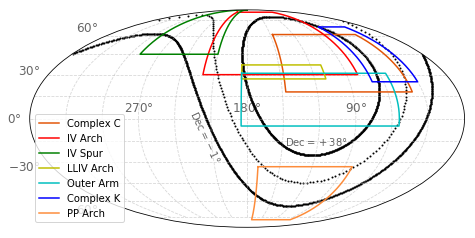

In [9]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, projection="mollweide")

# The GALFA-HI boundary 
eq_lon_up, eq_lat_up = equatorial_lat_line(dec=38)
plt.scatter(np.radians(eq_lon_up), np.radians(eq_lat_up), color='k', s=1)

eq_lon_med, eq_lat_med = equatorial_lat_line(dec=18)
plt.scatter(np.radians(eq_lon_med[::5]), np.radians(eq_lat_med[::5]), color='k', s=1)

eq_lon_low, eq_lat_low = equatorial_lat_line(dec=-1)
plt.scatter(np.radians(eq_lon_low), np.radians(eq_lat_low), color='k', s=1)

#This is to test if I do the coordiante right - yz
#for ra, cc in zip([0, 90, 180], ['r', 'b', 'g']):
#    eq_lon_tt, eq_lat_tt = equatorial_lon_line(ra=ra)
#    plt.scatter(np.radians(eq_lon_tt), np.radians(eq_lat_tt), color=cc, s=1)


# some IVCs from Table 1 on page 37 in the HVC book by van Woerden 2004
x_c = np.radians(180-np.array([147, 147, 39, 39, 147]))
y_c = np.radians(np.array([61, 18, 18, 61, 61]))
plt.plot(x_c, y_c, color=plt.cm.Oranges(0.7), label='Complex C')

x_ivarch = np.radians(180-np.array([220, 220, 80, 80, 220]))
y_ivarch = np.radians(np.array([85, 30, 30, 85, 85]))
plt.plot(x_ivarch, y_ivarch, color='r', label='IV Arch')

x_ivspur = np.radians(180-np.array([290, 290, 210, 210, 290]))
y_ivspur = np.radians(np.array([90, 45, 45, 90, 90]))
plt.plot(x_ivspur, y_ivspur, color='g', label='IV Spur')

x_llivarch = np.radians(180-np.array([185, 185, 110, 110, 185]))
y_llivarch = np.radians(np.array([37, 27, 27, 37, 37]))
plt.plot(x_llivarch, y_llivarch, color='y', label='LLIV Arch')

x_oa = np.radians(180-np.array([185, 185, 54, 54, 185]))
y_oa = np.radians(np.array([31, -5, -5, 31, 31]))
plt.plot(x_oa, y_oa, color='c', label='Outer Arm')

x_complexk = np.radians(180-np.array([70, 70, 30, 30, 70]))
y_complexk = np.radians(np.array([68, 25, 25, 68, 68]))
plt.plot(x_complexk, y_complexk, color='b', label='Complex K')

x_pparch = np.radians(180-np.array([170, 170, 83, 83, 170]))
y_pparch = np.radians(np.array([-33, -78, -78, -33, -33]))
plt.plot(x_pparch, y_pparch, color=plt.cm.Oranges(0.5), label='PP Arch')
plt.legend(fontsize=10)

# plot layout 
plt.grid(linestyle='--', alpha=0.5)
ax.set_xticklabels(['', '', r'$270\degree$', '', '', r'$180\degree$', '', '', 
                    r'$90\degree$', '', ''], fontsize=12, alpha=0.6)
ax.set_yticklabels(['', r'$-60\degree$', '', r'$-30\degree$', '', r'$0\degree$', 
                    '', r'$30\degree$', '', r'$60\degree$', ''], fontsize=12, alpha=0.6)
ax.text(-np.pi*0.27, 0, r'Dec$=-1\degree$', rotation=-65, alpha=0.6)
ax.text(np.pi*0.18, -np.pi*0.1, r'Dec$=+38\degree$', alpha=0.6)

plt.savefig('galfahi_ivc_coverage.pdf')